In [75]:
#importing libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns


In [76]:
df = pd.read_csv('/Users/shekhara/Downloads/hcvdat0.csv')

In [77]:
df.shape
df.drop(columns=['Unnamed: 0'])

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [78]:
data =df.dropna()

In [79]:
data.shape #after dropping the missing values

(589, 14)

## seperating disease from non disease, 0- non disease, 1- disease

In [86]:
# encoding sex column
data.replace({'Sex':{'m':0,'f':1}}, inplace=True)
# encoding Category column
data.replace({'Category':{'0=Blood Donor':0,'0s=suspect Blood Donor':0, '1=Hepatitis':1, '2=Fibrosis':1, '3=Cirrhosis':1}}, inplace=True)
dataset = data.drop(columns=['Unnamed: 0'])
dataset.head()
dataset.shape
print(dataset)


     Category  Age  Sex   ALB    ALP   ALT    AST   BIL    CHE  CHOL   CREA  \
0           0   32    0  38.5   52.5   7.7   22.1   7.5   6.93  3.23  106.0   
1           0   32    0  38.5   70.3  18.0   24.7   3.9  11.17  4.80   74.0   
2           0   32    0  46.9   74.7  36.2   52.6   6.1   8.84  5.20   86.0   
3           0   32    0  43.2   52.0  30.6   22.6  18.9   7.33  4.74   80.0   
4           0   32    0  39.2   74.1  32.6   24.8   9.6   9.15  4.32   76.0   
..        ...  ...  ...   ...    ...   ...    ...   ...    ...   ...    ...   
608         1   58    1  34.0   46.4  15.0  150.0   8.0   6.26  3.98   56.0   
609         1   59    1  39.0   51.3  19.6  285.8  40.0   5.77  4.51  136.1   
610         1   62    1  32.0  416.6   5.9  110.3  50.0   5.57  6.30   55.7   
611         1   64    1  24.0  102.8   2.9   44.4  20.0   1.54  3.02   63.0   
612         1   64    1  29.0   87.3   3.5   99.0  48.0   1.66  3.63   66.7   

       GGT  PROT  
0     12.1  69.0  
1     15.6  7

/var/folders/x3/8c6fjj7x7b5_w8b3qt9t3prr0000gq/T/ipykernel_33643/3215979157.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.replace({'Sex':{'m':0,'f':1}}, inplace=True)
/var/folders/x3/8c6fjj7x7b5_w8b3qt9t3prr0000gq/T/ipykernel_33643/3215979157.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.replace({'Category':{'0=Blood Donor':0,'0s=suspect Blood Donor':0, '1=Hepatitis':1, '2=Fibrosis':1, '3=Cirrhosis':1}}, inplace=True)


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


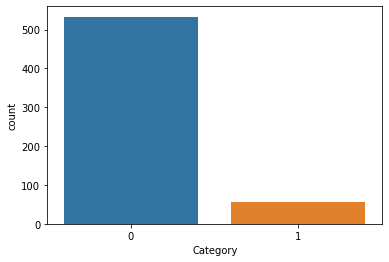

In [87]:
sns.countplot(dataset['Category'], label="Count")
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

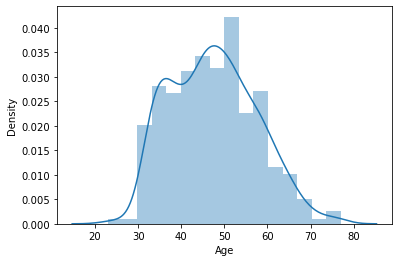

In [88]:
sns.distplot(dataset['Age'])

<AxesSubplot:xlabel='Category', ylabel='Age'>

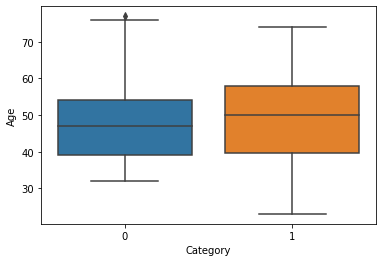

In [89]:
# Age and sex with survived
sns.boxplot(data=dataset, x='Category', y='Age')

## PCA 

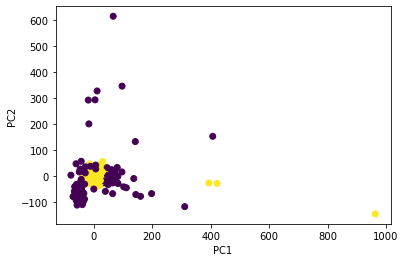

Accuracy: 0.9151103565365025


In [108]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the data into a DataFrame


# Separate the data into two categories
df_no_disease = dataset[dataset['Category']==0].drop(['Category'], axis=1)
df_with_disease = dataset[dataset['Category']==1].drop(['Category'], axis=1)

# Perform PCA on the data with 10 components
pca_no_disease = PCA(n_components=10).fit_transform(df_no_disease)
pca_with_disease = PCA(n_components=10).fit_transform(df_with_disease)

# Perform k-means clustering with k=2
kmeans_no_disease = KMeans(n_clusters=2, random_state=0).fit(pca_no_disease)
kmeans_with_disease = KMeans(n_clusters=2, random_state=0).fit(pca_with_disease)

# Align the predicted clusters with the true labels
true_labels_no_disease = np.zeros_like(kmeans_no_disease.labels_)
true_labels_with_disease = np.ones_like(kmeans_with_disease.labels_)
true_labels = np.concatenate((true_labels_no_disease, true_labels_with_disease))

predicted_labels_no_disease = kmeans_no_disease.labels_
predicted_labels_with_disease = kmeans_with_disease.labels_ + 2
predicted_labels = np.concatenate((predicted_labels_no_disease, predicted_labels_with_disease))

# Calculate the accuracy
accuracy = np.mean(true_labels == predicted_labels)

# Plot the results
plt.scatter(pca_no_disease[:, 0], pca_no_disease[:, 1], c=kmeans_no_disease.labels_)
plt.scatter(pca_with_disease[:, 0], pca_with_disease[:, 1], c=kmeans_with_disease.labels_ + 2)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Print the accuracy
print('Accuracy:', 1- accuracy)


## Applying KMeans on the one with diseases

In [121]:
# encoding Category column
# encoding sex column
df.replace({'Sex':{'m':0,'f':1}}, inplace=True)
df.replace({'Category':{'0=Blood Donor':0,'0s=suspect Blood Donor':1, '1=Hepatitis':2, '2=Fibrosis':3, '3=Cirrhosis':4}}, inplace=True)
df_with_disease = df[df['Category'] > 1]
print(df_with_disease)

     Category  Age  Sex   ALB    ALP    ALT    AST   BIL   CHE  CHOL  CREA  \
540         2   38    0  45.0   56.3    NaN   33.1   7.0  9.58  6.00  77.9   
541         2   19    0  41.0    NaN   87.0   67.0  12.0  7.55  3.90  62.0   
542         2   23    0  47.0   19.1   38.9  164.2  17.0  7.09  3.20  79.3   
543         2   25    0  42.0   38.2   63.3  187.7  14.0  6.00  4.28  66.9   
544         2   27    0  45.0   27.5   10.5   37.8  10.0  8.77  3.20  55.2   
..        ...  ...  ...   ...    ...    ...    ...   ...   ...   ...   ...   
610         3   62    1  32.0  416.6    5.9  110.3  50.0  5.57  6.30  55.7   
611         3   64    1  24.0  102.8    2.9   44.4  20.0  1.54  3.02  63.0   
612         3   64    1  29.0   87.3    3.5   99.0  48.0  1.66  3.63  66.7   
613         3   46    1  33.0    NaN   39.0   62.0  20.0  3.56  4.20  52.0   
614         3   59    1  36.0    NaN  100.0   80.0  12.0  9.07  5.30  67.0   

       GGT  PROT  
540   18.9  63.0  
541   65.0  75.0  
542   

In [147]:

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(axis=1)
    return df[indices_to_keep].astype(np.float64)
X= clean_dataset(df_with_disease)


/var/folders/x3/8c6fjj7x7b5_w8b3qt9t3prr0000gq/T/ipykernel_33643/3056887445.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [150]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=100, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)
true_labels = df_with_disease['Category']
accuracy = accuracy_score(true_labels, y_kmeans)
print("Accuracy:", accuracy)



ValueError: Expected 2D array, got 1D array instead:
array=[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [85]:
from sklearn.metrics import confusion_matrix
print(len(labels))
# retrieve actual labels
actual_labels = dataset["Category"].astype("category").cat.codes.values
print(len(actual_labels))

# create confusion matrix
cm = confusion_matrix(actual_labels, labels)
print(cm)


589
589
[[261 265   0   0   0]
 [  4   1   0   2   0]
 [ 10   8   0   2   0]
 [  7   5   0   0   0]
 [  8   0   1   9   6]]


## SOM

In [112]:
import numpy as np
from numpy.ma.core import ceil
from scipy.spatial import distance #distance calculation
from sklearn.preprocessing import MinMaxScaler #normalisation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score #scoring
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from matplotlib import animation, colors
import pandas as pd


In [113]:
data_x = dataset.drop(['Category'], axis =1)
data_y = dataset['Category']

In [114]:
# train and test split
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size=0.2, random_state=42)
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape) # check the shapes


(471, 12) (471,) (118, 12) (118,)


In [135]:
# Data Normalisation
def minmax_scaler(data):
    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(data)
    return scaled

# Euclidean distance
def e_distance(x,y):
    return distance.euclidean(x,y)

# Manhattan distance
def m_distance(x,y):
    return distance.cityblock(x,y)

# Best Matching Unit search
def winning_neuron(data, t, som, num_rows, num_cols):
    winner = [0,0]
    shortest_distance = np.sqrt(data.shape[1]) # initialise with max distance
    input_data = data[t]
    for row in range(num_rows):
        for col in range(num_cols):
            distance = e_distance(som[row][col], data[t])
        if distance < shortest_distance: 
            shortest_distance = distance
            winner = [row,col]
    return winner

# Learning rate and neighbourhood range calculation
def decay(step, max_steps,max_learning_rate,max_m_dsitance):
    coefficient = 1.0 - (np.float64(step)/max_steps)
    learning_rate = coefficient*max_learning_rate
    neighbourhood_range = ceil(coefficient * max_m_dsitance)
    return learning_rate, neighbourhood_range

In [146]:
# hyperparameters
num_rows = 10
num_cols = 10
max_m_dsitance = 4
max_learning_rate = 0.5
max_steps = int(30000)

# num_nurons = 5*np.sqrt(train_x.shape[0])
# grid_size = ceil(np.sqrt(num_nurons))
# print(grid_size)

In [147]:
#mian function

train_x_norm = minmax_scaler(train_x) # normalisation

# initialising self-organising map
num_dims = train_x_norm.shape[1] # numnber of dimensions in the input data
np.random.seed(40)
som = np.random.random_sample(size=(num_rows, num_cols, num_dims)) # map construction

# start training iterations
for step in range(max_steps):
    if (step+1) % 1000 == 0:
        print("Iteration: ", step+1) # print out the current iteration for every 1k
        learning_rate, neighbourhood_range = decay(step, max_steps,max_learning_rate,max_m_dsitance)

    t = np.random.randint(0,high=train_x_norm.shape[0]) # random index of traing data
    winner = winning_neuron(train_x_norm, t, som, num_rows, num_cols)
    for row in range(num_rows):
        for col in range(num_cols):
            if m_distance([row,col],winner) <= neighbourhood_range:
                som[row][col] += learning_rate*(train_x_norm[t]-som[row][col]) #update neighbour's weight

print("SOM training completed")

Iteration:  1000
Iteration:  2000
Iteration:  3000
Iteration:  4000
Iteration:  5000
Iteration:  6000
Iteration:  7000
Iteration:  8000
Iteration:  9000
Iteration:  10000
Iteration:  11000
Iteration:  12000
Iteration:  13000
Iteration:  14000
Iteration:  15000
Iteration:  16000
Iteration:  17000
Iteration:  18000
Iteration:  19000
Iteration:  20000
Iteration:  21000
Iteration:  22000
Iteration:  23000
Iteration:  24000
Iteration:  25000
Iteration:  26000
Iteration:  27000
Iteration:  28000
Iteration:  29000
Iteration:  30000
SOM training completed


In [148]:
label_data = np.array(train_y)
map = np.empty(shape=(num_rows, num_cols), dtype=object)

for row in range(num_rows):
    for col in range(num_cols):
        map[row][col] = [] # empty list to store the label
print(train_x_norm.shape[0])
for t in range(train_x_norm.shape[0]):
    if (t+1) % 1000 == 0:
        print("sample data: ", t+1)
        winner = winning_neuron(train_x_norm, t, som, num_rows, num_cols)
        map[winner[0]][winner[1]].append(label_data[t]) # label of winning neuron

471


[[0 0 0 0 0 0 0 0 0 2]
 [0 0 0 0 0 0 0 0 0 2]
 [0 0 0 0 0 0 0 0 0 2]
 [0 0 0 0 0 0 0 0 0 2]
 [0 0 0 0 0 0 0 0 0 2]
 [0 0 0 0 0 0 0 0 0 2]
 [0 0 0 0 0 0 0 0 0 2]
 [0 0 0 0 0 0 0 0 0 2]
 [0 0 0 0 0 0 0 0 0 2]
 [0 0 0 0 0 0 0 0 0 2]]


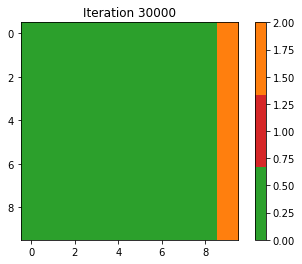

In [149]:
label_map = np.zeros(shape=(num_rows, num_cols),dtype=np.int64)
for row in range(num_rows):
    for col in range(num_cols):
        label_list = map[row][col]
        if len(label_list)==0:
            label = 2
        else:
            label = max(label_list, key=label_list.count)
    label_map[row][col] = label
print(label_map)
title = ('Iteration ' + str(max_steps))
cmap = colors.ListedColormap(['tab:green', 'tab:red', 'tab:orange'])
plt.imshow(label_map, cmap=cmap)
plt.colorbar()
plt.title(title)
plt.show()

In [150]:

# test data

# using the trained som, search the winning node of corresponding to the test data
# get the label of the winning node

data = minmax_scaler(test_x) # normalisation

winner_labels = []

for t in range(data.shape[0]):
    winner = winning_neuron(data, t, som, num_rows, num_cols)
    row = winner[0]
    col = winner[1]
    predicted = label_map[row][col]
    winner_labels.append(predicted)

print("Accuracy: ",accuracy_score(test_y, np.array(winner_labels)))

Accuracy:  0.06779661016949153


# Self Organizing Map 2.0

In [108]:
from sklearn_som.som import SOM

In [111]:
som_data = SOM(m=3, n=1, dim=2)
new_data = dataset[:, :4]
som_data.fit(dataset)

InvalidIndexError: (slice(None, None, None), slice(None, 4, None))